# Results analyzed and exported to use in figures

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd
import math
     
# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_violin,
    plot_points_mean_std,
    visualize_image,
    plot_scatter_size_coded,
    plot_histogram,
    plot_histogram_by_group,
    plot_pie_chart,
    plot_bar,
    plot_xy_with_regression,
    plot_heatmap,
    plot_early_peakers_heatmap,
    plot_category_distribution_by_dataset
    )
from calcium_activity_characterization.io.csv_loader import load_dataset
from calcium_activity_characterization.analysis.statistics import (
    analyze_peak_intervals,
    build_neighbor_pair_stats,
    kw_dunn,
    brunner_pairs,
    wilcoxon_pairs,
    corr_nonparametric
)

sns.set_style(
    style="whitegrid",
    rc={"font.family": "sans-serif", "font.sans-serif": ["Arial"]}
)

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

# Define control datasets
cells_counts = cells.groupby("dataset")["Cell ID"].count()

experiments["Dataset cell density"] = experiments["dataset"].map(cells_counts)
events["Dataset cell density"] = events["dataset"].map(cells_counts)
cells["Dataset cell density"] = cells["dataset"].map(cells_counts)
peaks["Dataset cell density"] = peaks["dataset"].map(cells_counts)
communications["Dataset cell density"] = communications["dataset"].map(cells_counts)

global_events_counts = events[events["Event type"]=="GlobalEvent"].groupby("dataset")["Event ID"].count()
sequential_events_counts = events[events["Event type"]=="SequentialEvent"].groupby("dataset")["Event ID"].count()
individual_events_counts = peaks[peaks["In event"]=="individual"].groupby("dataset")["Peak ID"].count()

experiments["Number of global events"] = experiments["dataset"].map(global_events_counts)
experiments["Number of sequential events"] = experiments["dataset"].map(sequential_events_counts)
experiments["Number of individual events"] = experiments["dataset"].map(individual_events_counts)

experiments["Number of global events"] = experiments["Number of global events"].fillna(0).astype(int)
experiments["Number of sequential events"] = experiments["Number of sequential events"].fillna(0).astype(int)
experiments["Number of individual events"] = experiments["Number of individual events"].fillna(0).astype(int)

celldensity_experiments = experiments[experiments["condition"] == "control - 1st run"].copy()
celldensity_events = events[events["condition"] == "control - 1st run"].copy()
celldensity_cells = cells[cells["condition"] == "control - 1st run"].copy()
celldensity_peaks = peaks[peaks["condition"] == "control - 1st run"].copy()
celldensity_communications = communications[communications["condition"] == "control - 1st run"].copy()

control_experiments = experiments[(experiments["condition"] == "control - 1st run") &
                                  (experiments["Dataset cell density"] > 900)].copy()

control_peaks = peaks[peaks["dataset"].isin(control_experiments["dataset"])].copy()
control_cells = cells[cells["dataset"].isin(control_experiments["dataset"])].copy()
control_events = events[events["dataset"].isin(control_experiments["dataset"])].copy()
control_communications = communications[communications["dataset"].isin(control_experiments["dataset"])].copy()

reference_dataset = experiments[experiments["dataset"] == "20250326_IS1"].copy()
reference_peaks = peaks[peaks["dataset"].isin(reference_dataset["dataset"])].copy()
reference_cells = cells[cells["dataset"].isin(reference_dataset["dataset"])].copy()
reference_events = events[events["dataset"].isin(reference_dataset["dataset"])].copy()
reference_communications = communications[communications["dataset"].isin(reference_dataset["dataset"])].copy()

figure_path=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


## FIGURE 3.1

[2025-09-10 12:27:28] [ERROR] calcium: Failed to read image 'D:\Mateo\20250326\Output\IS1\signal-processing\raster_plot.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250326\\Output\\IS1\\signal-processing\\raster_plot.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = open(fp, "rb")
FileNotFoundError: [Errno 2] No such file o

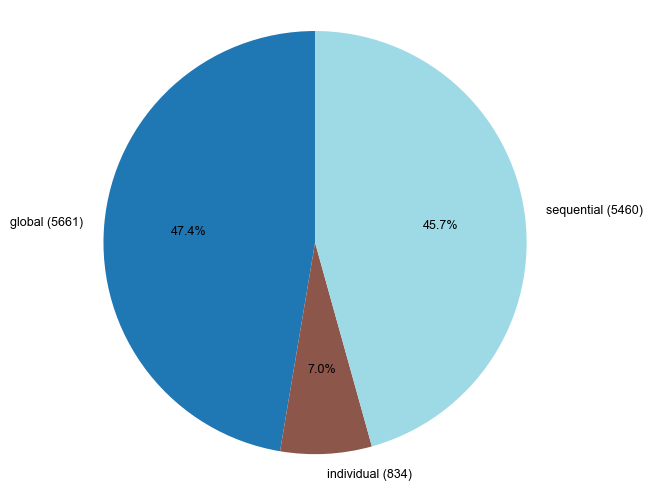

[2025-09-10 12:27:28] [INFO] calcium: plot_histogram_by_group: removed 23 outliers out of 11955 on 'Duration (s)' (lower=-132, upper=225)


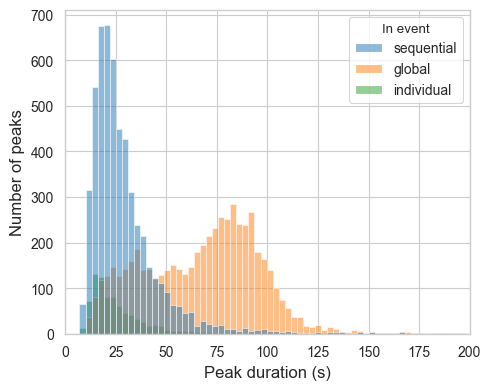

[2025-09-10 12:27:29] [INFO] calcium: plot_histogram_by_group: removed 52 outliers out of 11955 on 'Prominence (noise std units)' (lower=-210.35, upper=345.8)


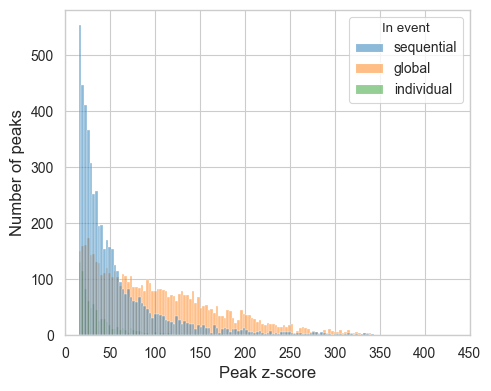

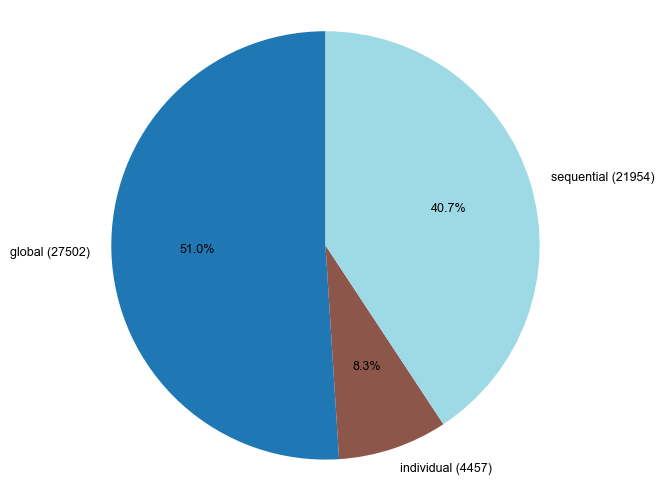

[2025-09-10 12:27:30] [INFO] calcium: plot_histogram_by_group: removed 40 outliers out of 53913 on 'Duration (s)' (lower=-134, upper=230)


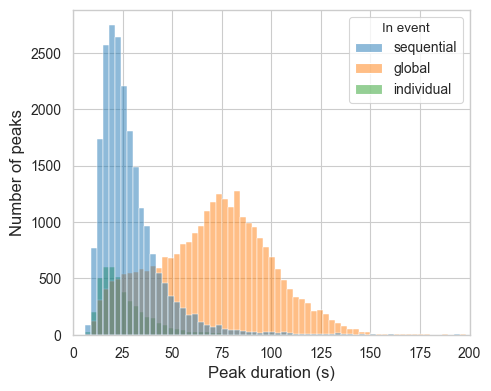

[2025-09-10 12:27:30] [INFO] calcium: plot_histogram_by_group: removed 128 outliers out of 53913 on 'Prominence (noise std units)' (lower=-391.6, upper=594.7)


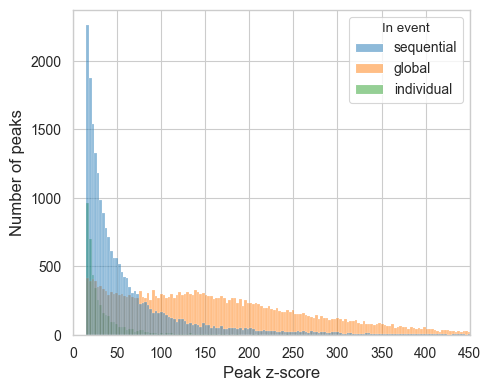

In [2]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="signal-processing/raster_plot.png",
    figsize=(10, 6)
)

plot_pie_chart(
    df=reference_peaks,
    column="In event",
    palette="tab20",
    save_svg_path=figure_path / "figure_3_1/single_peaks_distribution_by_event.svg"
)

reference_peaks["In event"] = reference_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Duration (s)",
    group_column="In event",
    xlabel="Peak duration (s)",
    ylabel="Number of peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path / "figure_3_1/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    xlabel="Peak z-score",
    ylabel="Number of peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path / "figure_3_1/single_peaks_prominence_by_event.svg"
)

plot_pie_chart(
    df=control_peaks,
    column="In event",
    palette="tab20",
    save_svg_path=figure_path / "figure_3_1/control_peaks_distribution_by_event.svg"
)

control_peaks["In event"] = control_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=control_peaks,
    value_column="Duration (s)",
    group_column="In event",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path / "figure_3_1/control_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=control_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path / "figure_3_1/control_peaks_prominence_by_event.svg"
)

## FIGURE 3.2

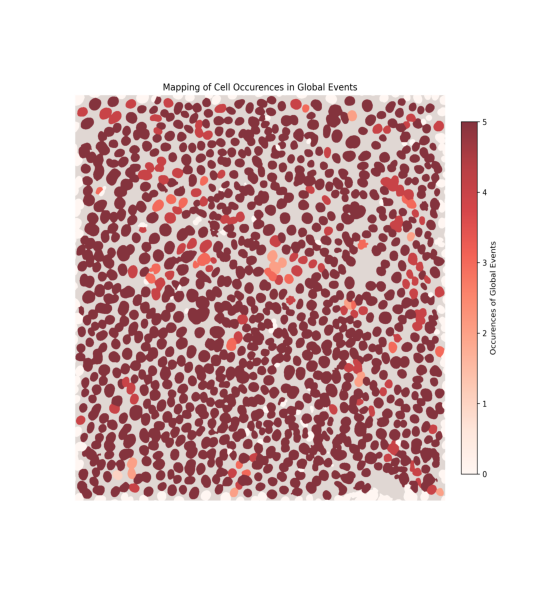

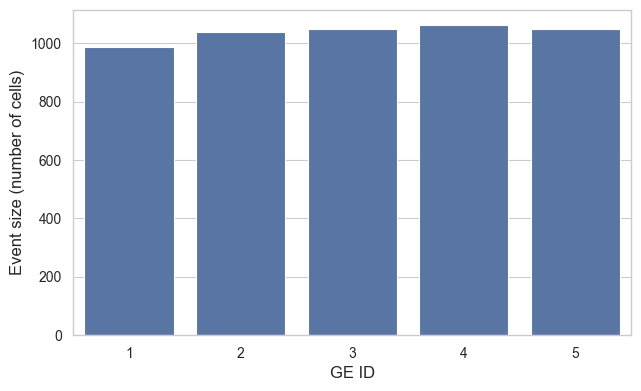

In [3]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    figsize=(5.5, 6)
)

reference_global_events = reference_events[reference_events["Event type"] == "GlobalEvent"].copy()
reference_global_events["% of cells involved"] = 100 * reference_global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=reference_global_events,
    axis_column="Event ID",
    value_column="Number of cells involved",
    ylabel="Event size (number of cells)",
    xlabel="GE ID",
    rotation=0,
    save_svg_path=figure_path / "figure_3_2/reference_global_events_cells_involved_barplot.svg",
)

control_global_events = control_events[control_events["Event type"] == "GlobalEvent"].copy()

cell_counts = cells.groupby("dataset").size().rename("Total number of cells").reset_index()
control_global_events = control_global_events.merge(cell_counts, on="dataset", how="left")

control_global_events["% of cells involved"] = (100 * control_global_events["Number of cells involved"] / control_global_events["Total number of cells"]).round(2)

[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=1
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=2
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=3
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=4
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=3 for Event ID=5


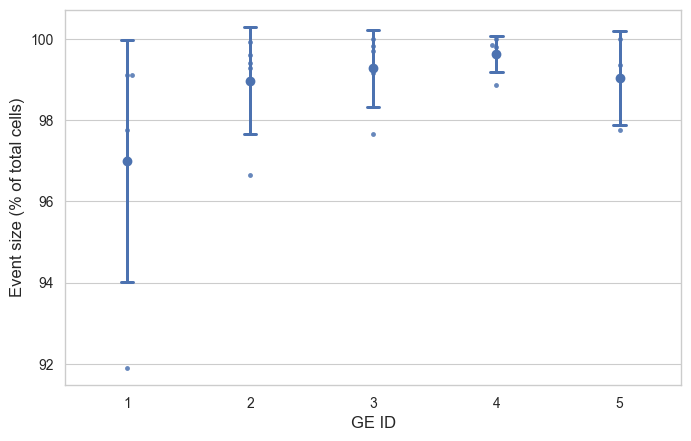

,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,mw_U,mw_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,1,4,5,5,97.77,97.06,99.11,99.80,99.59,99.850,2.0,0.031746,0.080000,-0.840000,-2.03,-7.90,-0.48,0.126984,False
1,1,3,5,5,97.77,97.06,99.11,99.70,99.17,99.840,3.0,0.055556,0.120000,-0.760000,-1.93,-7.80,0.10,0.166667,False
2,1,2,5,5,97.77,97.06,99.11,99.41,99.29,99.620,4.0,0.095238,0.160000,-0.680000,-1.64,-7.51,1.12,0.190476,False
3,1,5,5,3,97.77,97.06,99.11,99.35,98.56,99.675,2.5,0.250000,0.166667,-0.666667,-1.58,-7.45,1.34,0.250000,False


In [4]:

plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="% of cells involved",
    ylabel="Event size (% of total cells)",
    xlabel="GE ID",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_2/control_global_events_percentage_cells_involved_pointplot.svg",
)

wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="% of cells involved",
    pairs=[(1,2),(1,3),(1,4),(1,5)],
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: removed 0/18 outliers on 'interval' (lower=-57.25, upper=649.75)
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for index=0-1
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for index=1-2
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=5 for index=2-3
[2025-09-10 12:27:34] [INFO] calcium: plot_points_mean_std: N=3 for index=3-4


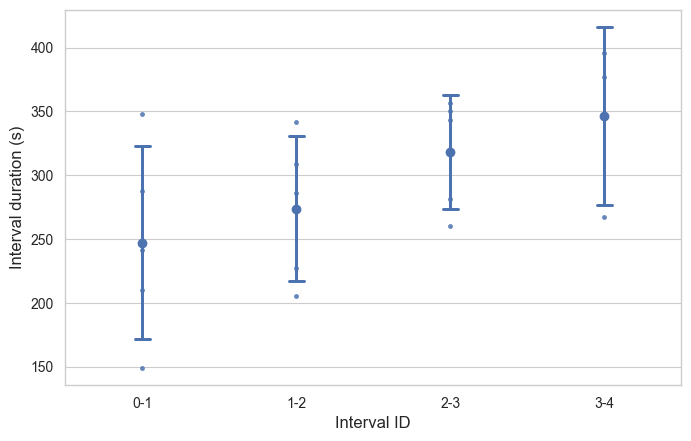

Periodicity 
 - N = 5
 - Mean = 0.88 a.u.
 - Std = 0.09 a.u.

Frequency 
 - N = 4
 - Mean = 0.0033 Hz
 - Std = 0.0006 Hz



,method,n,estimate,p_value,ci_low,ci_high,theilsen_slope,theilsen_slope_ci_low,theilsen_slope_ci_high,theilsen_intercept
0,kendall_tau_b,18,0.428047,0.022213,0.007811,0.745848,35.0,7.0,64.0,217.0
1,spearman,18,0.526454,0.024802,0.026496,0.842768,35.0,7.0,64.0,217.0


In [5]:

intervals_list = []
periodicity_list = []

for dataset_name, df_subset in control_global_events.groupby("dataset"):
    intervals, periodicity, frequency = analyze_peak_intervals(df_subset["Event peak time (s)"].tolist())
    periodicity_list.append({
        "dataset": dataset_name,
        "periodicity": periodicity,
        "frequency": frequency if periodicity > 0.8 else None
    })
    for idx, val in enumerate(intervals):
        intervals_list.append({
            "dataset": dataset_name,
            "index": f"{idx}-{idx+1}",
            "interval": val
        })

intervals_df = pd.DataFrame(intervals_list)
periodicity_df = pd.DataFrame(periodicity_list)

plot_points_mean_std(
    df=intervals_df,
    x="index",
    y="interval",
    ylabel="Interval duration (s)",
    xlabel="Interval ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_2/control_events_intervals_distribution.svg"
)

print(f"Periodicity \n - N = {periodicity_df['periodicity'].count()}\n - Mean = {periodicity_df['periodicity'].mean():.2f} a.u.\n - Std = {periodicity_df['periodicity'].std():.2f} a.u.\n")
print(f"Frequency \n - N = {periodicity_df['frequency'].count()}\n - Mean = {periodicity_df['frequency'].mean():.4f} Hz\n - Std = {periodicity_df['frequency'].std():.4f} Hz\n")

wilcoxon_pairs(
    df=intervals_df,
    group_col="index",
    value_col="interval",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="index",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

intervals_df["index_int"] = intervals_df["index"].str.split("-").str[0].astype(int) + 1

corr_nonparametric(
    df=intervals_df,
    x_col="index_int",
    y_col="interval",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
    exact_kendall_if_small=True
)

## FIGURE 3.3

[2025-09-10 12:27:35] [INFO] calcium: plot_histogram_by_group: removed 36 outliers out of 27502 on 'Duration (s)' (lower=-74, upper=213)


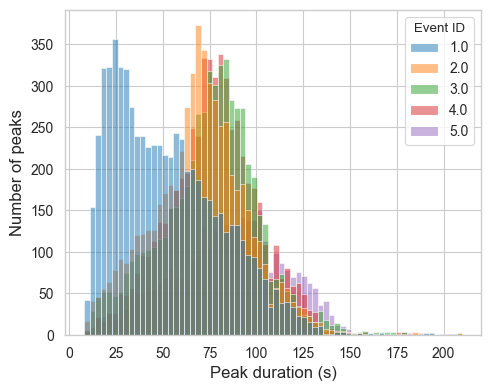

[2025-09-10 12:27:36] [INFO] calcium: plot_histogram_by_group: removed 30 outliers out of 27502 on 'Prominence (noise std units)' (lower=-389, upper=703)


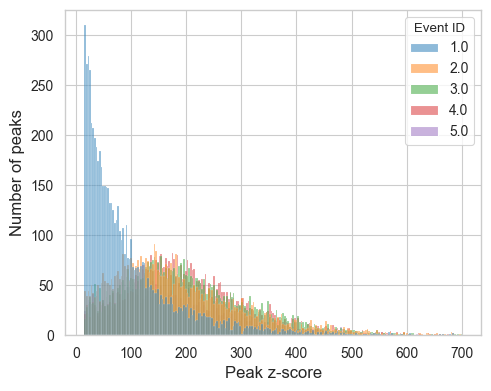

In [6]:
plot_histogram_by_group(
    df=control_peaks[control_peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_3/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=control_peaks[control_peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_3/single_peaks_prominence_by_event.svg"
)

mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")


[2025-09-10 12:27:38] [INFO] calcium: plot_violin: removed 56 outliers out of 27502 on 'Duration (s)' (lower=-104, upper=222)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)


[2025-09-10 12:27:38] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_3\control_peaks_duration_by_event.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


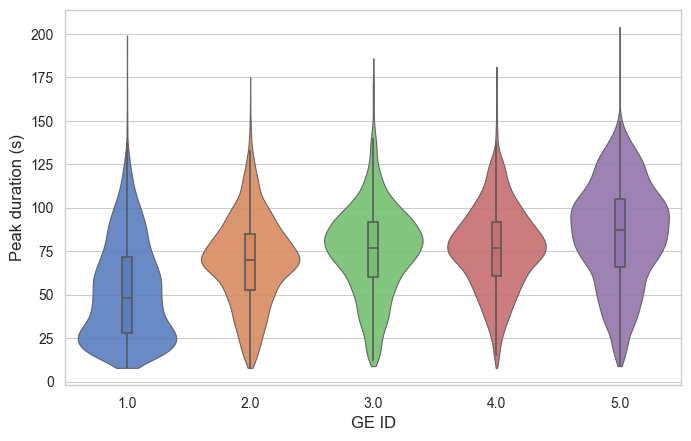

[2025-09-10 12:27:38] [INFO] calcium: plot_violin: removed 56 outliers out of 27502 on 'Duration (s)' (lower=-104, upper=222)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,1,3,6780,5780,48.0,28.0,72.0,77.0,60.0,92.0,51.040786,0.000000e+00,0.270337,-0.459326,-29.0,-31.0,-28.0,0.000000e+00,True
1,1,4,6780,5687,48.0,28.0,72.0,77.0,61.0,92.0,56.471608,0.000000e+00,0.253158,-0.493684,-29.0,-31.0,-28.0,0.000000e+00,True
2,1,5,6780,3394,48.0,28.0,72.0,87.0,66.0,105.0,60.367337,0.000000e+00,0.215433,-0.569133,-39.0,-41.0,-37.0,0.000000e+00,True
3,1,2,6780,5805,48.0,28.0,72.0,70.0,53.0,85.0,38.649880,1.271535e-308,0.316622,-0.366756,-22.0,-24.0,-21.0,1.271535e-308,True


In [7]:

plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="GE ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path / "figure_3_3/control_peaks_duration_by_event.svg"
)

bn_df = brunner_pairs(
    df=subset_peaks_global_events,
    group_col="Event ID",
    value_col="Duration (s)",
    pairs=[(1,2),(1,3),(1,4),(1,5)],
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

display(bn_df)

[2025-09-10 12:27:39] [INFO] calcium: plot_violin: removed 132 outliers out of 27502 on 'Prominence (noise std units)' (lower=-352.28, upper=714.7)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:39] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_3\control_peaks_prominence_by_event.svg (svg)


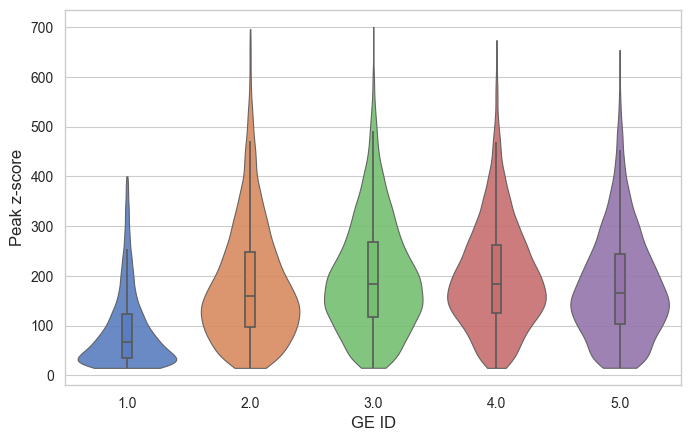

[2025-09-10 12:27:39] [INFO] calcium: plot_violin: removed 132 outliers out of 27502 on 'Prominence (noise std units)' (lower=-352.28, upper=714.7)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,1,2,6673,5816,66.5,34.8,122.5,159.35,97.475,247.225,62.410951,0.0,0.235838,-0.528324,-92.85,-96.40250,-88.84750,0.0,True
1,1,3,6673,5791,66.5,34.8,122.5,184.10,118.250,267.400,77.570380,0.0,0.196345,-0.607310,-117.60,-121.20250,-113.30000,0.0,True
2,1,4,6673,5700,66.5,34.8,122.5,184.65,124.525,262.625,81.396572,0.0,0.186572,-0.626856,-118.15,-122.70000,-114.69875,0.0,True
3,1,5,6673,3390,66.5,34.8,122.5,165.10,103.525,243.600,54.319474,0.0,0.231206,-0.537588,-98.60,-102.90125,-92.69750,0.0,True


In [8]:


plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="GE ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path / "figure_3_3/control_peaks_prominence_by_event.svg"
)

brunner_pairs(
    df=subset_peaks_global_events,
    group_col="Event ID",
    value_col="Prominence (noise std units)",
    pairs=[(1,2),(1,3),(1,4),(1,5)],
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)


[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: removed 0/23 outliers on 'Time to 50% (s)' (lower=22, upper=99)
[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=1
[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=2
[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=3
[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=4
[2025-09-10 12:27:40] [INFO] calcium: plot_points_mean_std: N=3 for Event ID=5


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1360: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


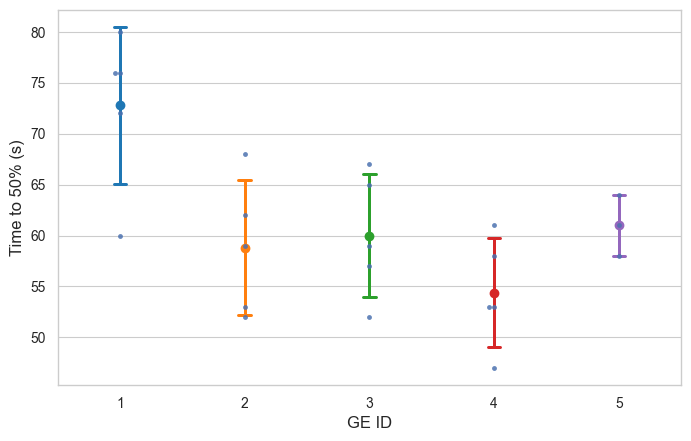

,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,mw_U,mw_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,1,4,5,5,76.0,72.0,76.0,53.0,53.0,58.0,24.0,0.015873,0.960000,0.920000,23.0,7.0,29.000,0.063492,False
1,1,2,5,5,76.0,72.0,76.0,59.0,53.0,62.0,23.0,0.031746,0.920000,0.840000,17.0,1.0,24.075,0.095238,False
2,1,3,5,5,76.0,72.0,76.0,59.0,57.0,65.0,23.0,0.031746,0.920000,0.840000,17.0,1.0,24.000,0.095238,False
3,1,5,5,3,76.0,72.0,76.0,61.0,59.5,62.5,13.0,0.142857,0.866667,0.733333,15.0,-1.0,19.000,0.142857,False


In [9]:
plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Time to 50% (s)",
    ylabel="Time to 50% (s)",
    xlabel="GE ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_3/control_events_time_to_50_percent_pointplot.svg",
    mean_palette="tab10"
)

wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="Time to 50% (s)",
    pairs=[(1,2),(1,3),(1,4),(1,5)],
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: removed 0/23 outliers on 'Normalized peak rate at 50% (% of peaks/s)' (lower=-0.45, upper=4.45)
[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=1
[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=2
[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=3
[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=4
[2025-09-10 12:27:41] [INFO] calcium: plot_points_mean_std: N=3 for Event ID=5


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1360: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


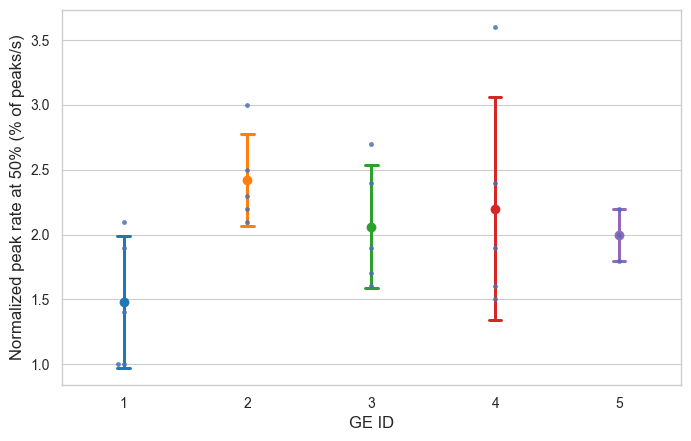

,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,mw_U,mw_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,1,2,5,5,1.4,1.0,1.9,2.3,2.2,2.5,0.5,0.015873,0.02,-0.96,-0.9,-1.6,-0.2,0.063492,False
1,1,3,5,5,1.4,1.0,1.9,1.9,1.7,2.4,5.5,0.222222,0.22,-0.56,-0.5,-1.4,0.3,0.666667,False
2,1,4,5,5,1.4,1.0,1.9,1.9,1.6,2.4,5.5,0.222222,0.22,-0.56,-0.5,-2.2,0.4,0.666667,False
3,1,5,5,3,1.4,1.0,1.9,2.0,1.9,2.1,3.0,0.250000,0.20,-0.60,-0.6,-1.2,0.1,0.666667,False


In [10]:
plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Normalized peak rate at 50% (% of peaks/s)",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="GE ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path / "figure_3_3/control_events_normalized_peak_rate_at_50_percent_pointplot.svg",
    mean_palette="tab10"
)

wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="Normalized peak rate at 50% (% of peaks/s)",
    pairs=[(1,2),(1,3),(1,4),(1,5)],
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

## Figure 3.4

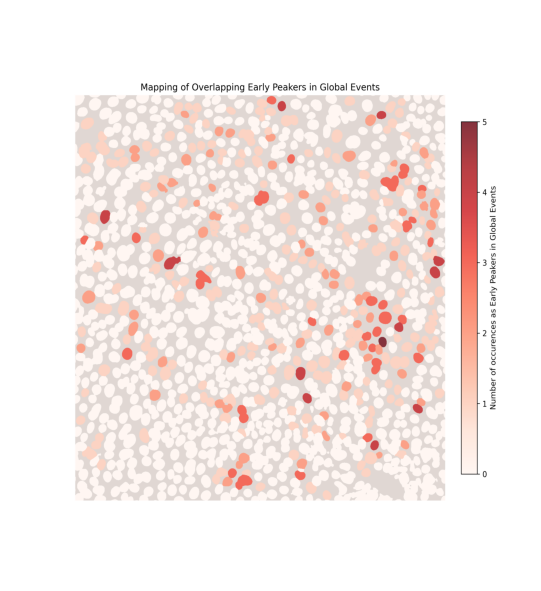

[2025-09-10 12:27:43] [WARNING] calcium: 'total_events' is deprecated and ignored. Using 5 unique event IDs.
[2025-09-10 12:27:43] [INFO] calcium: Early peakers event-matrix: 336 cells x 5 events; black squares: 516


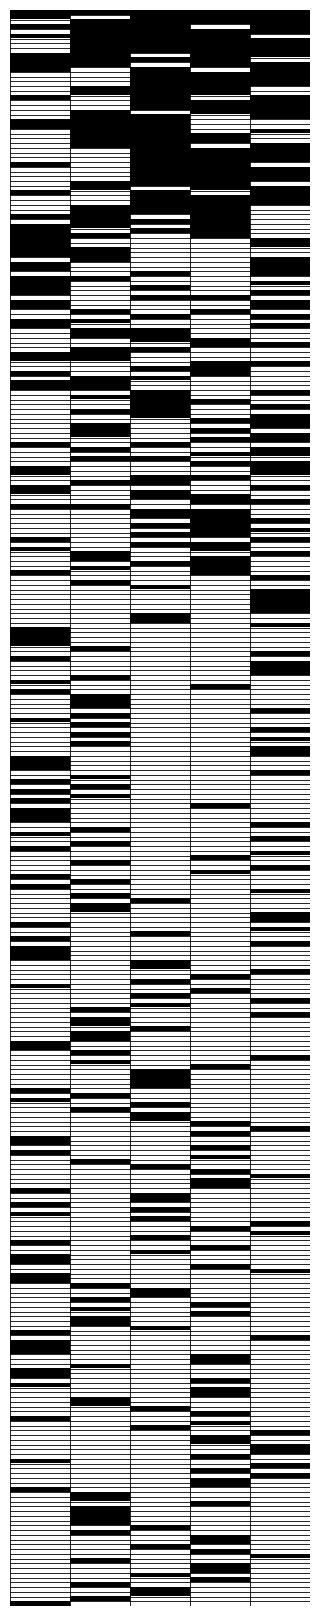

[2025-09-10 12:27:43] [INFO] calcium: Saved early peakers heatmap SVG to: C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_4\global_events_early_peakers_heatmap.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:462: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([dataset_col, category_col])


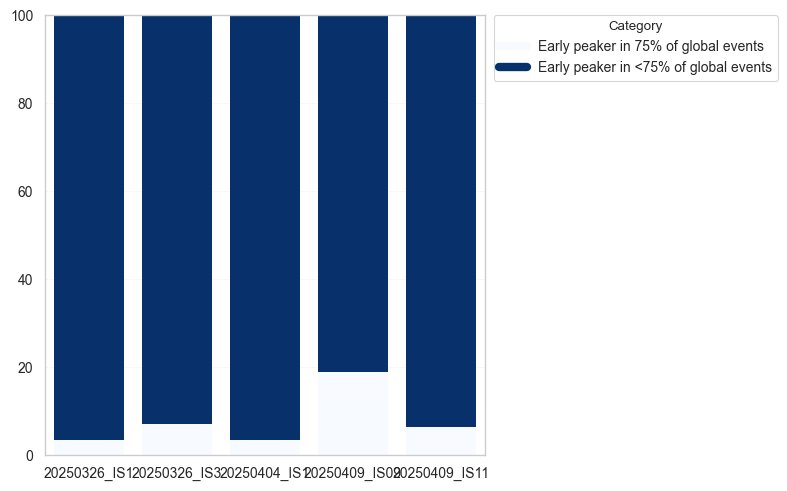

WindowsPath('C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3/figure_3_4/control_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg')

In [11]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    figsize=(5.5, 6)
)

plot_early_peakers_heatmap(
    cells=reference_cells,
    total_events=len(reference_global_events),
    output_svg=figure_path / "figure_3_4/global_events_early_peakers_heatmap.svg",
)

total_events = len(reference_global_events)
threshold_count = math.ceil(0.75 * total_events)

reference_cells["early peakers in 75% of global events"] = (
    reference_cells["Occurrences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

events_per_ds = control_global_events.groupby("dataset")["Event ID"].nunique().rename("total_events")
totals = control_cells["dataset"].map(events_per_ds).fillna(0).astype(int)
threshold_count = np.ceil(0.75 * totals).astype(int)

control_cells["early peakers in 75% of global events"] = (
    control_cells["Occurrences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

col = "early peakers in 75% of global events"

control_cells[col] = (
    control_cells[col]
    .map({
        True:  "Early peaker in 75% of global events",
        False: "Early peaker in <75% of global events",
    })
    .astype("category")  # optional: nice for plotting
)

plot_category_distribution_by_dataset(
    df=control_cells[control_cells["Occurrences in global events as early peaker"] > 0],
    category_col="early peakers in 75% of global events",
    dataset_col="dataset",
    save_path=figure_path / "figure_3_4/control_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg",
    palette="Blues"
)

## Figure 3.5

[2025-09-10 12:27:43] [INFO] calcium: plot_histogram: removed 135 outliers out of 5460 on 'Duration (s)' (lower=-30, upper=82)
[2025-09-10 12:27:44] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\reference_peaks_duration_distribution.svg (svg)


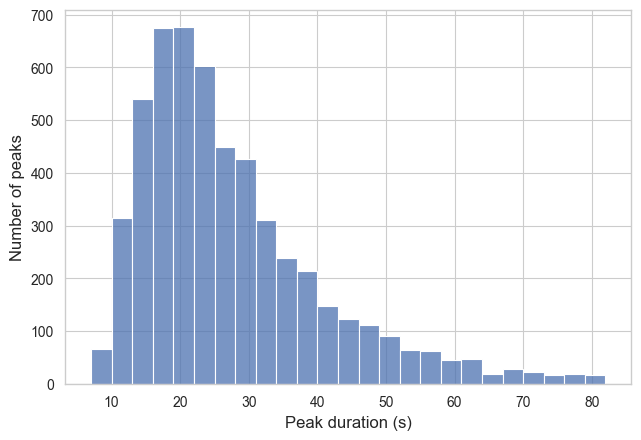

[2025-09-10 12:27:44] [INFO] calcium: plot_histogram: removed 160 outliers out of 5460 on 'Prominence (noise std units)' (lower=-109.6, upper=201.2)
[2025-09-10 12:27:44] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\reference_peaks_prominence_distribution.svg (svg)


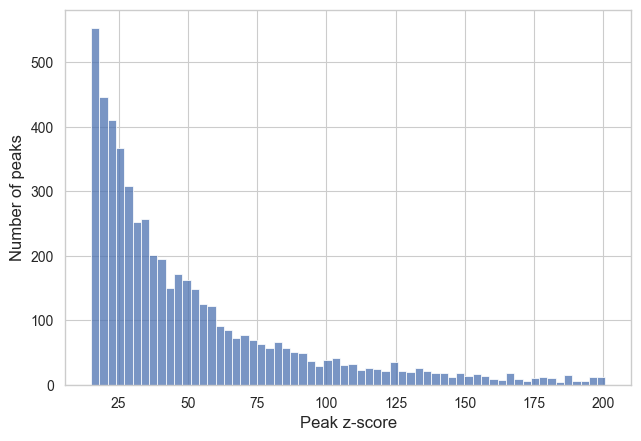

[2025-09-10 12:27:44] [INFO] calcium: plot_histogram: removed 7 outliers out of 4293 on 'Speed (um/s)' (lower=-11.52, upper=27.36)
[2025-09-10 12:27:44] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\communications_speed_distribution.svg (svg)


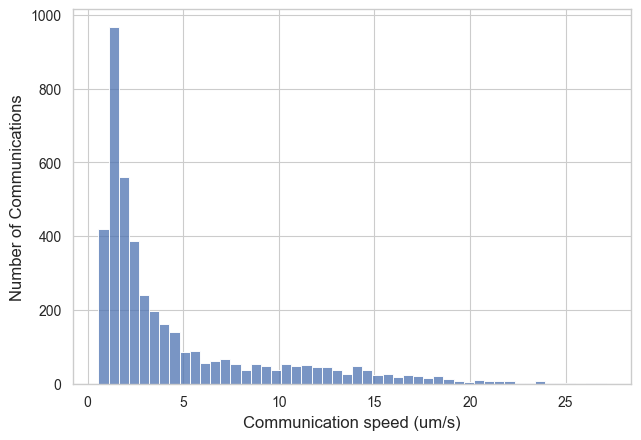

[2025-09-10 12:27:44] [INFO] calcium: plot_histogram: removed 0 outliers out of 1167 on 'Number of cells involved' (lower=-10, upper=26)
[2025-09-10 12:27:44] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\reference_sequential_events_number_of_cells_involved_distribution.svg (svg)


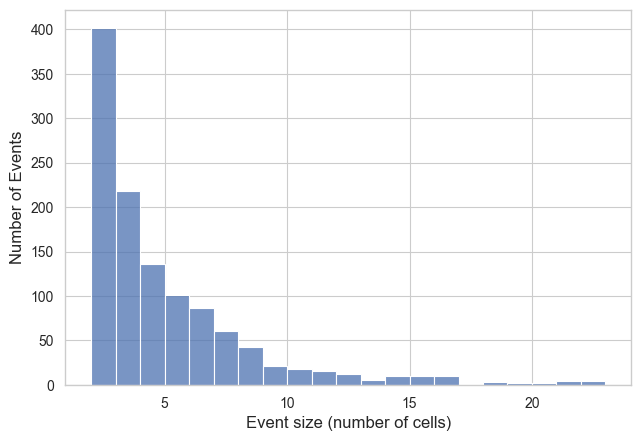

In [12]:
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Duration (s)",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_5/reference_peaks_duration_distribution.svg"
)
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_5/reference_peaks_prominence_distribution.svg"
)
plot_histogram(
    df=reference_communications,
    column="Speed (um/s)",
    ylabel="Number of Communications",
    xlabel="Communication speed (um/s)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_5/communications_speed_distribution.svg"
)
reference_sequential_events = reference_events[reference_events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=reference_sequential_events,
    column="Number of cells involved",
    ylabel="Number of Events",
    xlabel="Event size (number of cells)",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    save_svg_path=figure_path / "figure_3_5/reference_sequential_events_number_of_cells_involved_distribution.svg"
)


control_peaks["dataset name"] = control_peaks['date'].astype(str) + " - " + control_peaks['image_sequence'].astype(str)

mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

[2025-09-10 12:27:44] [INFO] calcium: plot_violin: removed 378 outliers out of 21954 on 'Duration (s)' (lower=-36, upper=90)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:45] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\control_peaks_duration_distribution.svg (svg)


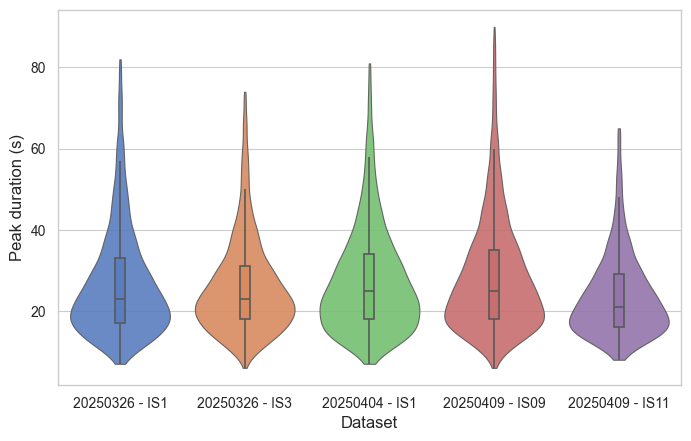

[2025-09-10 12:27:45] [INFO] calcium: plot_violin: removed 378 outliers out of 21954 on 'Duration (s)' (lower=-36, upper=90)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,20250409 - IS09,20250409 - IS11,4171,1349,25.0,18.0,35.0,21.0,16.0,29.0,-11.987830,2.906060e-32,0.601940,0.203881,4.0,3.0,5.0,2.906060e-31,True
1,20250404 - IS1,20250409 - IS11,4038,1349,25.0,18.0,34.0,21.0,16.0,29.0,-9.384587,1.298952e-20,0.580597,0.161194,4.0,2.0,4.0,1.169057e-19,True
2,20250326 - IS3,20250409 - IS09,6693,4171,23.0,18.0,31.0,25.0,18.0,35.0,8.447457,3.490628e-17,0.451596,-0.096808,-2.0,-3.0,-1.0,2.792502e-16,True
3,20250326 - IS1,20250409 - IS09,5325,4171,23.0,17.0,33.0,25.0,18.0,35.0,7.066745,1.703729e-12,0.458059,-0.083883,-2.0,-3.0,-1.0,1.192610e-11,True
4,20250326 - IS1,20250409 - IS11,5325,1349,23.0,17.0,33.0,21.0,16.0,29.0,-6.852100,9.254667e-12,0.557148,0.114296,2.0,1.0,3.0,5.552800e-11,True
5,20250326 - IS3,20250409 - IS11,6693,1349,23.0,18.0,31.0,21.0,16.0,29.0,-6.663402,3.456710e-11,0.556235,0.112469,2.0,1.0,3.0,1.728355e-10,True
6,20250326 - IS3,20250404 - IS1,6693,4038,23.0,18.0,31.0,25.0,18.0,34.0,4.812341,1.519831e-06,0.471961,-0.056078,-2.0,-2.0,0.0,6.079325e-06,True
7,20250326 - IS1,20250404 - IS1,5325,4038,23.0,17.0,33.0,25.0,18.0,34.0,3.612517,3.049468e-04,0.478264,-0.043472,-2.0,-2.0,0.0,9.148404e-04,True
8,20250404 - IS1,20250409 - IS09,4038,4171,25.0,18.0,34.0,25.0,18.0,35.0,3.208983,1.337185e-03,0.479576,-0.040848,0.0,-2.0,0.0,2.674370e-03,True
9,20250326 - IS1,20250326 - IS3,5325,6693,23.0,17.0,33.0,23.0,18.0,31.0,-0.782123,4.341593e-01,0.504175,0.008350,0.0,-1.0,1.0,4.341593e-01,False


In [13]:
plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_peaks_duration_distribution.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="dataset name",
    value_col="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-09-10 12:27:47] [INFO] calcium: plot_violin: removed 651 outliers out of 21954 on 'Prominence (noise std units)' (lower=-243.1, upper=392.5)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:47] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\control_peaks_prominence_distribution.svg (svg)


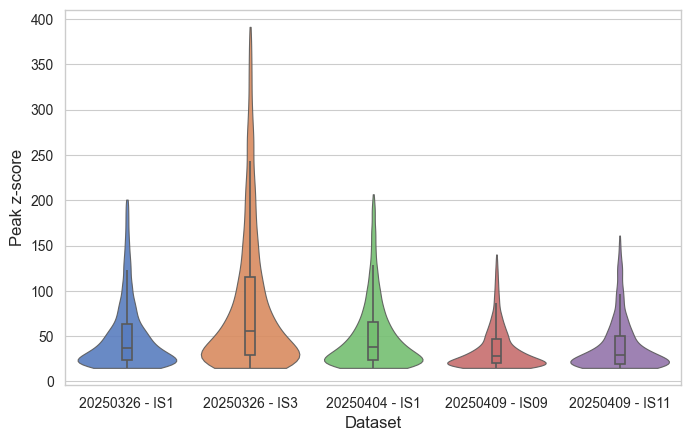

[2025-09-10 12:27:47] [INFO] calcium: plot_violin: removed 651 outliers out of 21954 on 'Prominence (noise std units)' (lower=-243.1, upper=392.5)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,20250326 - IS3,20250409 - IS09,6703,4052,55.7,29.0,114.95,28.10,19.9,46.600,-45.233209,0.000000e+00,0.718345,0.436690,27.60,25.59875,29.50000,0.000000e+00,True
1,20250326 - IS3,20250409 - IS11,6703,1286,55.7,29.0,114.95,29.55,19.7,50.675,-28.229059,4.925420e-150,0.701455,0.402911,26.15,24.00000,28.45125,4.432878e-149,True
2,20250326 - IS1,20250326 - IS3,5300,6703,36.8,23.3,63.20,55.70,29.0,114.950,25.908340,4.727174e-144,0.370084,-0.259832,-18.90,-20.80250,-16.80000,3.781740e-143,True
3,20250326 - IS3,20250404 - IS1,6703,3962,55.7,29.0,114.95,38.20,23.8,66.100,-22.343491,5.925936e-108,0.620493,0.240987,17.50,15.20000,19.60000,4.148155e-107,True
4,20250404 - IS1,20250409 - IS09,3962,4052,38.2,23.8,66.10,28.10,19.9,46.600,-18.876932,9.119689e-78,0.617604,0.235208,10.10,8.80000,11.40000,5.471813e-77,True
5,20250326 - IS1,20250409 - IS09,5300,4052,36.8,23.3,63.20,28.10,19.9,46.600,-18.154288,2.204128e-72,0.605484,0.210967,8.70,7.40000,9.80000,1.102064e-71,True
6,20250404 - IS1,20250409 - IS11,3962,1286,38.2,23.8,66.10,29.55,19.7,50.675,-10.980091,2.420498e-27,0.599029,0.198058,8.65,7.19875,10.70000,9.681992e-27,True
7,20250326 - IS1,20250409 - IS11,5300,1286,36.8,23.3,63.20,29.55,19.7,50.675,-9.948144,8.778222e-23,0.587328,0.174656,7.25,5.89875,9.10125,2.633467e-22,True
8,20250326 - IS1,20250404 - IS1,5300,3962,36.8,23.3,63.20,38.20,23.8,66.100,1.955791,5.052236e-02,0.488147,-0.023706,-1.40,-3.10000,0.05000,1.010447e-01,False
9,20250409 - IS09,20250409 - IS11,4052,1286,28.1,19.9,46.60,29.55,19.7,50.675,1.550065,1.212856e-01,0.485270,-0.029461,-1.45,-2.55000,0.20000,1.212856e-01,False


In [14]:
plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_peaks_prominence_distribution.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="dataset name",
    value_col="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-09-10 12:27:49] [INFO] calcium: plot_violin: removed 43 outliers out of 17179 on 'Speed (um/s)' (lower=-16.555, upper=37.31)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:49] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\control_communications_speed_distribution.svg (svg)


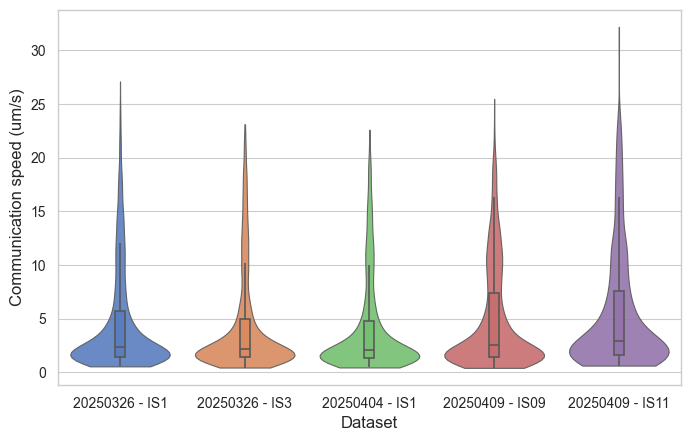

[2025-09-10 12:27:49] [INFO] calcium: plot_violin: removed 43 outliers out of 17179 on 'Speed (um/s)' (lower=-16.555, upper=37.31)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,20250404 - IS1,20250409 - IS11,3199,931,2.060,1.305,4.820,2.940,1.625,7.565,9.059542,3.779982e-19,0.405974,-0.188053,-0.880,-1.15025,-0.649750,3.779982e-18,True
1,20250404 - IS1,20250409 - IS09,3199,3192,2.060,1.305,4.820,2.535,1.400,7.385,7.433707,1.194580e-13,0.446632,-0.106737,-0.475,-0.64000,-0.314875,1.075122e-12,True
2,20250326 - IS1,20250404 - IS1,4286,3199,2.410,1.440,5.720,2.060,1.305,4.820,-6.886975,6.225455e-12,0.546462,0.092924,0.350,0.23000,0.460000,4.980364e-11,True
3,20250326 - IS3,20250409 - IS11,5528,931,2.170,1.430,4.950,2.940,1.625,7.565,6.871971,1.000875e-11,0.429474,-0.141053,-0.770,-1.05000,-0.510000,7.006124e-11,True
4,20250326 - IS1,20250409 - IS11,4286,931,2.410,1.440,5.720,2.940,1.625,7.565,4.817987,1.614491e-06,0.449672,-0.100656,-0.530,-0.80000,-0.300000,9.686946e-06,True
5,20250326 - IS3,20250404 - IS1,5528,3199,2.170,1.430,4.950,2.060,1.305,4.820,-4.363163,1.303053e-05,0.528347,0.056695,0.110,0.02000,0.210000,6.515264e-05,True
6,20250326 - IS3,20250409 - IS09,5528,3192,2.170,1.430,4.950,2.535,1.400,7.385,4.236848,2.300997e-05,0.472263,-0.055474,-0.365,-0.52000,-0.214875,9.203990e-05,True
7,20250409 - IS09,20250409 - IS11,3192,931,2.535,1.400,7.385,2.940,1.625,7.565,3.589425,3.412506e-04,0.462386,-0.075228,-0.405,-0.70000,-0.159875,1.023752e-03,True
8,20250326 - IS1,20250326 - IS3,4286,5528,2.410,1.440,5.720,2.170,1.430,4.950,-3.366177,7.653361e-04,0.519810,0.039620,0.240,0.13000,0.340000,1.530672e-03,True
9,20250326 - IS1,20250409 - IS09,4286,3192,2.410,1.440,5.720,2.535,1.400,7.385,1.455093,1.456923e-01,0.490083,-0.019834,-0.125,-0.28500,0.035000,1.456923e-01,False


In [15]:
control_communications["dataset name"] = control_communications['date'].astype(str) + " - " + control_communications['image_sequence'].astype(str)

plot_violin(
    df=control_communications,
    x="dataset name",
    y="Speed (um/s)",
    ylabel="Communication speed (um/s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_communications_speed_distribution.svg"
)

brunner_pairs(
    df=control_communications,
    group_col="dataset name",
    value_col="Speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 5),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-09-10 12:27:50] [INFO] calcium: plot_violin: removed 37 outliers out of 4775 on 'Number of cells involved' (lower=-10, upper=26)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:51] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_5\control_events_number_of_cells_involved_distribution.svg (svg)


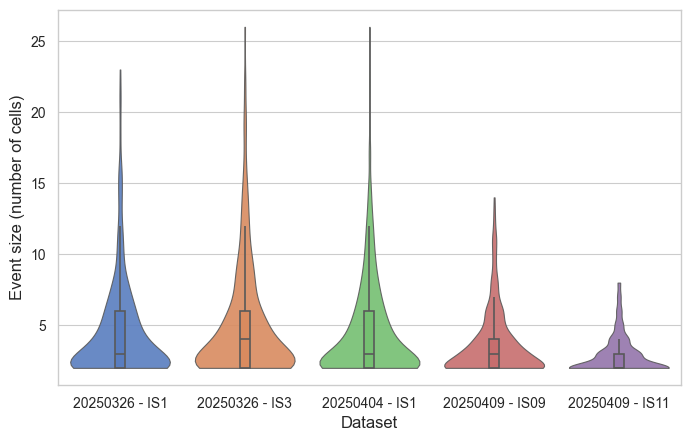

[2025-09-10 12:27:51] [INFO] calcium: plot_violin: removed 37 outliers out of 4775 on 'Number of cells involved' (lower=-10, upper=26)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,20250326 - IS3,20250409 - IS11,1258,419,4.0,2.0,6.0,2.0,2.0,3.0,-15.083973,1.115953e-46,0.692140,0.384280,2.0,1.0,2.0,1.115953e-45,True
1,20250326 - IS1,20250409 - IS11,1167,419,3.0,2.0,6.0,2.0,2.0,3.0,-11.886165,1.262741e-30,0.659600,0.319200,1.0,1.0,1.0,1.136467e-29,True
2,20250404 - IS1,20250409 - IS11,869,419,3.0,2.0,6.0,2.0,2.0,3.0,-11.300641,3.814063e-28,0.660753,0.321506,1.0,1.0,2.0,3.051250e-27,True
3,20250326 - IS3,20250409 - IS09,1258,1025,4.0,2.0,6.0,3.0,2.0,4.0,-8.747607,4.150425e-18,0.599782,0.199563,1.0,0.0,1.0,2.905297e-17,True
4,20250409 - IS09,20250409 - IS11,1025,419,3.0,2.0,4.0,2.0,2.0,3.0,-6.973584,5.876416e-12,0.602151,0.204303,1.0,1.0,1.0,3.525850e-11,True
5,20250326 - IS1,20250409 - IS09,1167,1025,3.0,2.0,6.0,3.0,2.0,4.0,-5.428239,6.320415e-08,0.564000,0.128000,0.0,0.0,0.0,3.160207e-07,True
6,20250404 - IS1,20250409 - IS09,869,1025,3.0,2.0,6.0,3.0,2.0,4.0,-5.232036,1.886004e-07,0.567257,0.134514,0.0,0.0,1.0,7.544015e-07,True
7,20250326 - IS1,20250326 - IS3,1167,1258,3.0,2.0,6.0,4.0,2.0,6.0,3.193540,1.423435e-03,0.463486,-0.073027,-1.0,-1.0,0.0,4.270306e-03,True
8,20250326 - IS3,20250404 - IS1,1258,869,4.0,2.0,6.0,3.0,2.0,6.0,-2.605378,9.249278e-03,0.532320,0.064640,1.0,0.0,1.0,1.849856e-02,True
9,20250326 - IS1,20250404 - IS1,1167,869,3.0,2.0,6.0,3.0,2.0,6.0,0.341394,7.328461e-01,0.495681,-0.008637,0.0,-1.0,0.0,7.328461e-01,False


In [16]:
control_events["dataset name"] = control_events['date'].astype(str) + " - " + control_events['image_sequence'].astype(str)
control_sequential_events = control_events[control_events["Event type"] == "SequentialEvent"].copy()


plot_violin(
    df=control_sequential_events,
    x="dataset name",
    y="Number of cells involved",
    ylabel="Event size (number of cells)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_5/control_events_number_of_cells_involved_distribution.svg"
)

brunner_pairs(
    df=control_sequential_events,
    group_col="dataset name",
    value_col="Number of cells involved",
    filter_outliers=True,
    outliers_bounds=(3, 5),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

## FIGURE 3.6

In [17]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "02"
    elif n == 3:
        return "03"
    elif n == 4:
        return "04"
    elif n == 5:
        return "05"
    elif n == 6:
        return "06"
    elif n == 7:
        return "07"
    elif n == 8:
        return "08"
    elif n == 9:
        return "09"
    else:
        return "10+"

control_sequential_events["Number of cells involved category"] = control_sequential_events["Number of cells involved"].apply(seq_events_category)

seq_map = (
    control_sequential_events[
        ["dataset", "Event ID", "Number of cells involved category", "Number of cells involved"]
    ].drop_duplicates(subset=["dataset", "Event ID"])
)

subset_peaks_sequential_events = subset_peaks_sequential_events.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)

control_communications = control_communications.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)


[2025-09-10 12:27:51] [INFO] calcium: plot_violin: removed 375 outliers out of 21954 on 'Duration (s)' (lower=-32, upper=85.25)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:52] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved.svg (svg)


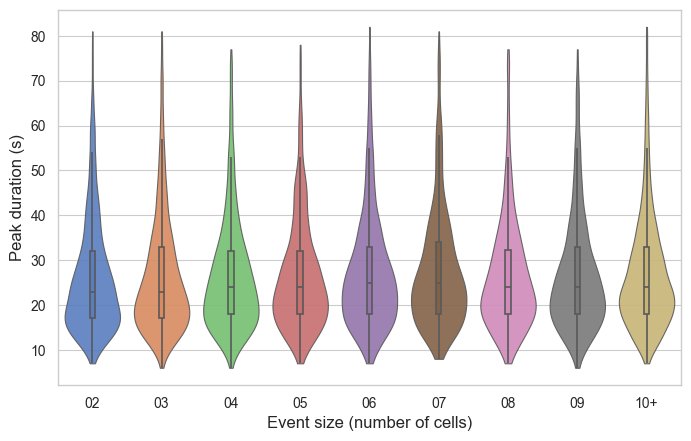

[2025-09-10 12:27:52] [INFO] calcium: plot_violin: removed 375 outliers out of 21954 on 'Duration (s)' (lower=-32, upper=85.25)


,group1,group2,n1,n2,median1,q1_1,q3_1,median2,q1_2,q3_2,bm_stat,bm_p,vd_A,cliffs_delta,median_diff,med_ci_low,med_ci_high,p_adj,reject
0,02,10+,3427,5949,23.0,17.0,32.00,24.0,18.0,33.00,4.627331,0.000004,0.471113,-0.057774,-1.0,-1.000,0.0,0.000136,True
1,02,06,3427,1814,23.0,17.0,32.00,25.0,18.0,33.00,4.409694,0.000011,0.463500,-0.073000,-2.0,-2.000,-1.0,0.000372,True
2,02,07,3427,1308,23.0,17.0,32.00,25.0,18.0,34.00,4.348870,0.000014,0.459997,-0.080005,-2.0,-2.000,-1.0,0.000484,True
3,03,07,2765,1308,23.0,17.0,33.00,25.0,18.0,34.00,3.761636,0.000172,0.464091,-0.071818,-2.0,-2.000,-1.0,0.005688,True
4,03,06,2765,1814,23.0,17.0,33.00,25.0,18.0,33.00,3.728796,0.000195,0.467735,-0.064530,-2.0,-3.000,-1.0,0.006241,True
5,03,10+,2765,5949,23.0,17.0,33.00,24.0,18.0,33.00,3.659502,0.000255,0.475406,-0.049188,-1.0,-2.000,0.0,0.007913,True
6,04,07,2169,1308,24.0,18.0,32.00,25.0,18.0,34.00,2.635700,0.008443,0.473470,-0.053059,-1.0,-2.000,0.0,0.253285,False
7,04,06,2169,1814,24.0,18.0,32.00,25.0,18.0,33.00,2.499628,0.012473,0.477085,-0.045830,-1.0,-2.000,0.0,0.361730,False
8,05,07,1886,1308,24.0,18.0,32.00,25.0,18.0,34.00,2.300628,0.021485,0.476158,-0.047683,-1.0,-2.000,0.0,0.601582,False
9,05,06,1886,1814,24.0,18.0,32.00,25.0,18.0,33.00,2.157711,0.031015,0.479537,-0.040926,-1.0,-2.000,0.0,0.837393,False


In [18]:

plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Duration (s)",
    xlabel="Event size (number of cells)",
    ylabel="Peak duration (s)",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="Number of cells involved category",
    value_col="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-09-10 12:27:55] [INFO] calcium: plot_violin: removed 894 outliers out of 21954 on 'Prominence (noise std units)' (lower=-181.9, upper=304.6)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-09-10 12:27:56] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_3\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved_prominence.svg (svg)


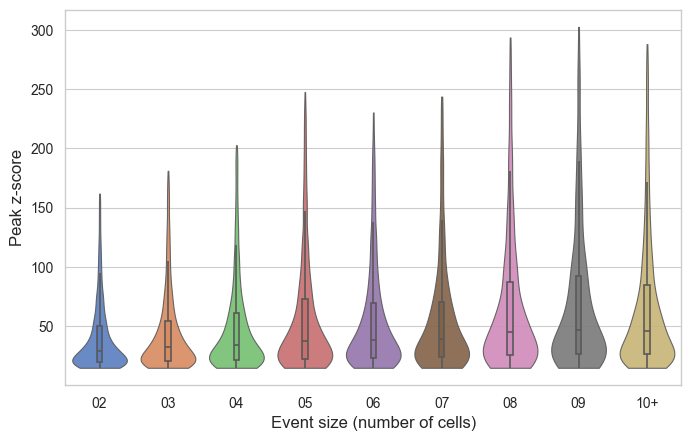

[2025-09-10 12:27:56] [INFO] calcium: plot_violin: removed 894 outliers out of 21954 on 'Prominence (noise std units)' (lower=-181.9, upper=304.6)


In [ ]:
plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Prominence (noise std units)",
    xlabel="Event size (number of cells)",
    ylabel="Peak z-score",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_prominence.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="Number of cells involved category",
    value_col="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)


corr_nonparametric(
    df=subset_peaks_sequential_events,
    x_col="Number of cells involved",
    y_col="Prominence (noise std units)",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

In [ ]:
plot_violin(
    control_communications,
    x="Number of cells involved category",
    y="Speed (um/s)",
    xlabel="Event size (number of cells)",
    ylabel="Communication speed (um/s)",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_speed.svg"
)

brunner_pairs(
    df=control_communications,
    group_col="Number of cells involved category",
    value_col="Speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

corr_nonparametric(
    df=control_communications,
    x_col="Number of cells involved",
    y_col="Speed (um/s)",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

## FIGURE 3.7

In [ ]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_Occurrences_in_sequential_events_overlay.png",
    figsize=(5, 6)
)

pairs_communication_df = build_neighbor_pair_stats(
    cells_df=control_cells,
    comm_df=control_communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
    )

plot_histogram(
    df=reference_communications,
    column="Distance (um)",
    ylabel="Number of communications",
    xlabel="Inter-nuclear distance (um)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path / "figure_3_7/reference_communications_distance_distribution.svg",
    x_axis_boundaries=(0, 40)
)

plot_histogram(
    df=pairs_communication_df[pairs_communication_df["dataset"]=="20250326_IS1"],
    column="distance_um",
    ylabel="Number of pairs",
    xlabel="Inter-nuclear distance (um)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path / "figure_3_7/pairs_communication_distance_distribution.svg",
    x_axis_boundaries=(0, 40)
)

pairs_communication_df["Distance truncated (um)"] = np.floor(pairs_communication_df["distance_um"]).astype(int)
average = pairs_communication_df.groupby(["dataset", "Distance truncated (um)"], as_index=False)
comm_by_distance_df = average.agg(n_pairs=("n_communications", "size"), total_communications=("n_communications", "sum"))
comm_by_distance_df["average number of communications"] = comm_by_distance_df["total_communications"] / comm_by_distance_df["n_pairs"]

events_df = control_sequential_events.groupby("dataset", as_index=False).size().rename(columns={"size": "n_events"})
comm_by_distance_df = comm_by_distance_df.merge(events_df, on="dataset", how="left")
comm_by_distance_df["n_events"] = comm_by_distance_df["n_events"].fillna(0).astype(int)
comm_by_distance_df["average number of communications normalized"] = comm_by_distance_df["average number of communications"] / comm_by_distance_df["n_events"]

plot_bar(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23) & (comm_by_distance_df["dataset"]=="20250326_IS1")],
    axis_column="Distance truncated (um)",
    value_column="average number of communications normalized",
    xlabel="Inter-nuclear distance (um)",
    ylabel="Number of communications normalized by number of SE and pair",
    rotation=0,
    palette="muted",
    hue_column="dataset",
    save_svg_path=figure_path / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_barplot.svg"
)

In [ ]:
plot_points_mean_std(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    x="Distance truncated (um)",
    y="average number of communications normalized",
    xlabel="Inter-nuclear distance (um)",
    ylabel="Number of communications normalized by number of SE and pair",
    save_svg_path=figure_path / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_points.svg"
)

wilcoxon_results = wilcoxon_pairs(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    group_col="Distance truncated (um)",
    value_col="average number of communications normalized",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(wilcoxon_results)

corr_results = corr_nonparametric(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    x_col="Distance truncated (um)",
    y_col="average number of communications normalized",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
    exact_kendall_if_small=True
)

display(corr_results)

## FIGURE 3.8

In [ ]:
# --- 1) Pair stats & per-dataset 95th percentile --------------------------------
pairs_communication_df = build_neighbor_pair_stats(
    cells_df=control_cells,
    comm_df=control_communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
)

# Per-dataset 95th percentile
pairs_communication_df["p95"] = (
    pairs_communication_df.groupby("dataset")["n_communications"]
    .transform(lambda s: s.quantile(0.97))
)

top_pair_communication_df = pairs_communication_df.loc[
    pairs_communication_df["n_communications"] >= pairs_communication_df["p95"],
    ["dataset", "Cell A", "Cell B", "n_communications"]
].copy()

# Canonical pair key in top pairs (Cell A < Cell B assumed)
top_pair_communication_df["pair_key"] = list(
    zip(top_pair_communication_df["Cell A"], top_pair_communication_df["Cell B"])
)

# --- 2) Communications tagging with (dataset, pair_key) -------------------------
origin_com = control_communications["Origin cell ID"]
cause_com = control_communications["Cause cell ID"]

# Canonicalize the pair for every communication row
control_communications["pair_key"] = list(
    zip(
        origin_com.where(origin_com <= cause_com, cause_com),
        cause_com.where(cause_com >= origin_com, origin_com),
    )
)

top_pairs_idx = pd.MultiIndex.from_frame(
    top_pair_communication_df[["dataset", "pair_key"]].drop_duplicates()
)

# Tag directly via MultiIndex.isin (safe to run many times)
control_communications = control_communications.copy()
control_communications["from_high_comm_pair"] = pd.MultiIndex.from_frame(
    control_communications[["dataset", "pair_key"]]
).isin(top_pairs_idx)

control_communications["from_high_comm_pair"] = control_communications["from_high_comm_pair"].fillna(False)

# --- 3) Peaks tagging with (dataset, Cell ID, Peak ID) --------------------------
peaks_in_top_comms = pd.concat(
    [
        control_communications.loc[
            control_communications["from_high_comm_pair"],
            ["dataset", "Origin cell ID", "Origin cell peak ID"],
        ].rename(columns={"Origin cell ID": "Cell ID", "Origin cell peak ID": "Peak ID"}),
        control_communications.loc[
            control_communications["from_high_comm_pair"],
            ["dataset", "Cause cell ID", "Cause cell peak ID"],
        ].rename(columns={"Cause cell ID": "Cell ID", "Cause cell peak ID": "Peak ID"}),
    ],
    ignore_index=True,
).drop_duplicates()

control_peaks["from_high_comm_pair"] = pd.MultiIndex.from_frame(
    control_peaks[["dataset", "Cell ID", "Peak ID"]]
).isin(
    pd.MultiIndex.from_frame(peaks_in_top_comms[["dataset", "Cell ID", "Peak ID"]])
)

# --- 4) Highly connected cells (per dataset) ------------------------------------
# Count, per dataset, how many top pairs each cell belongs to
cells_in_pairs = pd.concat(
    [
        top_pair_communication_df[["dataset", "Cell A"]].rename(columns={"Cell A": "Cell ID"}),
        top_pair_communication_df[["dataset", "Cell B"]].rename(columns={"Cell B": "Cell ID"}),
    ],
    ignore_index=True,
)

highly_connected_cells = (
    cells_in_pairs.groupby(["dataset", "Cell ID"]).size()
    .reset_index(name="Number of highly connected pairs")
)

# --- 5) Per-cell comm stats within top pairs, per dataset -----------------------
comms_high = control_communications.loc[
    control_communications["from_high_comm_pair"], ["dataset", "Origin cell ID", "Cause cell ID"]
].copy()

origin_counts = (
    comms_high.groupby("dataset")["Origin cell ID"]
    .value_counts()
    .rename("n_origin")
    .reset_index()
    .rename(columns={"Origin cell ID": "Cell ID"})
)

cause_counts = (
    comms_high.groupby("dataset")["Cause cell ID"]
    .value_counts()
    .rename("n_cause")
    .reset_index()
    .rename(columns={"Cause cell ID": "Cell ID"})
)

per_cell_comm = origin_counts.merge(
    cause_counts, on=["dataset", "Cell ID"], how="outer"
).fillna(0)

per_cell_comm[["n_origin", "n_cause"]] = per_cell_comm[["n_origin", "n_cause"]].astype(int)
per_cell_comm["Number of communications (top pairs)"] = (
    per_cell_comm["n_origin"] + per_cell_comm["n_cause"]
)
per_cell_comm["Origin ratio (origin/communications)"] = (
    per_cell_comm["n_origin"]
    / per_cell_comm["Number of communications (top pairs)"].replace({0: pd.NA})
)

# Merge into highly_connected_cells (by dataset + Cell ID)
highly_connected_cells = highly_connected_cells.merge(
    per_cell_comm[[
        "dataset", "Cell ID",
        "Number of communications (top pairs)",
        "n_origin",
        "Origin ratio (origin/communications)"
    ]],
    on=["dataset", "Cell ID"],
    how="left"
)

# Fill any missing stats
highly_connected_cells[["Number of communications (top pairs)", "n_origin"]] = (
    highly_connected_cells[["Number of communications (top pairs)", "n_origin"]]
    .fillna(0).astype(int)
)
highly_connected_cells["Origin ratio (origin/communications)"] = (
    highly_connected_cells["Origin ratio (origin/communications)"].fillna(0.0)
)

highly_connected_cells["Highly connected pairs"] = highly_connected_cells["Number of highly connected pairs"].apply(lambda x: True if x > 2 else False)

In [ ]:
plot_histogram(
    df=pairs_communication_df[pairs_communication_df["dataset"]=="20250326_IS1"],
    column="n_communications",
    ylabel="Number of pairs",
    xlabel="Number of communications per pair",
    bin_width=1,
    filter_outliers=False,
    outliers_bounds=(3,3),
    save_svg_path=figure_path / "figure_3_8/reference_pair_communication_frequency_distribution.svg"
)

visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    figsize=(7, 8)
)

plot_category_distribution_by_dataset(
    df=highly_connected_cells,
    category_col="Number of highly connected pairs",
    dataset_col="dataset",
    ylabel="Percentage of cells (%)",
    save_path=figure_path / "figure_3_8/distribution_highly_connected_cells_by_dataset.svg"
)

In [ ]:
plot_points_mean_std(
    df=highly_connected_cells,
    x="Number of highly connected pairs",
    y="Origin ratio (origin/communications)",
    xlabel="Number of high-frequency communications",
    ylabel="Fraction of communications initiated by the cell",
    show_points=False,
    y_axis_boundaries=(0, 1),
    save_svg_path=figure_path / "figure_3_8/origin_ratios_by_highly_connected_pairs.svg"
)

wilcoxon_results = wilcoxon_pairs(
    df=highly_connected_cells,
    group_col="Number of highly connected pairs",
    value_col="Origin ratio (origin/communications)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(wilcoxon_results)

corr_results = corr_nonparametric(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Origin ratio (origin/communications)",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
)

display(corr_results)

In [ ]:
plot_violin(
    df=control_peaks[control_peaks["In event"] == "sequential"],
    x="from_high_comm_pair",
    y="Duration (s)",
    xlabel="Highly connected pair",
    ylabel="Peak duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path / "figure_3_8/distribution_peaks_duration_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=control_peaks[control_peaks["In event"] == "sequential"],
    group_col="from_high_comm_pair",
    value_col="Duration (s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

In [ ]:
plot_violin(
    df=control_peaks[control_peaks["In event"] == "sequential"],
    x="from_high_comm_pair",
    y="Prominence (noise std units)",
    xlabel="Highly connected pair",
    ylabel="Peak z-score",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path / "figure_3_8/distribution_peaks_prominence_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=control_peaks[control_peaks["In event"] == "sequential"],
    group_col="from_high_comm_pair",
    value_col="Prominence (noise std units)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

In [ ]:
plot_violin(
    df=control_communications,
    x="from_high_comm_pair",
    y="Speed (um/s)",
    xlabel="Highly connected pair",
    ylabel="Communication speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path / "figure_3_8/distribution_speeds_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=control_communications,
    group_col="from_high_comm_pair",
    value_col="Speed (um/s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

## FIGURE 3.10

In [ ]:
control_individual_peaks = control_peaks[control_peaks["In event"] == "individual"].copy()

visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_Occurrences_in_individual_events_overlay.png",
    figsize=(7, 8)
)

plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "individual"],
    column="Duration (s)",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_10/reference_peaks_duration_distribution_individual_events.svg"
)
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path / "figure_3_10/reference_peaks_prominence_distribution_individual_events.svg"
)

control_cells["Involved in individual event"] = control_cells["Occurrences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")
control_cells["dataset name"] = control_cells['date'].astype(str) + " - " + control_cells['image_sequence'].astype(str)

plot_category_distribution_by_dataset(
    df=control_cells,
    category_col="Involved in individual event",
    dataset_col="dataset name",
    ylabel="Percentage of cells (%)",
    save_path=figure_path / "figure_3_10/control_cells_involvement_in_individual_events_by_dataset.svg",
    palette="Blues"
)

control_peaks["dataset name"] = control_peaks['date'].astype(str) + " - " + control_peaks['image_sequence'].astype(str)

In [ ]:
plot_violin(
    df=control_individual_peaks,
    x="dataset name",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_10/control_individual_peaks_duration_distribution.svg"
)

brunner_pairs(
    df=control_individual_peaks,
    group_col="dataset name",
    value_col="Duration (s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name"
)

In [ ]:
plot_violin(
    df=control_individual_peaks,
    x="dataset name",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path / "figure_3_10/control_individual_peaks_prominence_distribution.svg"
)

brunner_pairs(
    df=control_individual_peaks,
    group_col="dataset name",
    value_col="Prominence (noise std units)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name"
)

## FIGURE 3.11

In [ ]:
plot_heatmap(
    df=reference_cells,
    x="Occurrences in individual events",
    y="Occurrences in sequential events",
    bins_x=16,
    bins_y=16,
    range_x=(0,16),
    range_y=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path / "figure_3_11/reference_cells_individual_vs_sequential_events_heatmap.svg"
)

plot_heatmap(
    df=reference_cells,
    y="Occurrences in global events",
    x="Occurrences in sequential events",
    bins_y=6,
    bins_x=16,
    range_y=(0,6),
    range_x=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path / "figure_3_11/reference_cells_global_vs_sequential_events_heatmap.svg"
)

plot_heatmap(
    df=reference_cells,
    y="Occurrences in global events",
    x="Occurrences in individual events",
    bins_y=6,
    bins_x=16,
    range_y=(0,6),
    range_x=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path / "figure_3_11/reference_cells_individual_vs_global_events_heatmap.svg"
)


x_col = "Occurrences in individual events"
counts = control_cells[x_col].value_counts()

valid_x = counts[counts >= 20].index
indiv_filtered_cells = control_cells[control_cells[x_col].isin(valid_x)]

x_col = "Occurrences in sequential events"
counts = control_cells[x_col].value_counts()

valid_x = counts[counts >= 20].index
seq_filtered_cells = control_cells[control_cells[x_col].isin(valid_x)]

In [ ]:
plot_points_mean_std(
    df= indiv_filtered_cells,
    y="Occurrences in sequential events",
    x="Occurrences in individual events",
    save_svg_path=figure_path / "figure_3_11/control_cells_individual_vs_sequential_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

brunner_results = brunner_pairs(
    df=indiv_filtered_cells,
    group_col="Occurrences in individual events",
    value_col="Occurrences in sequential events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=indiv_filtered_cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in sequential events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

In [ ]:

plot_points_mean_std(
    df= seq_filtered_cells,
    x="Occurrences in sequential events",
    y="Occurrences in global events",
    save_svg_path=figure_path / "figure_3_11/control_cells_sequential_vs_global_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

brunner_results = brunner_pairs(
    df=seq_filtered_cells,
    group_col="Occurrences in sequential events",
    value_col="Occurrences in global events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=seq_filtered_cells,
    x_col="Occurrences in sequential events",
    y_col="Occurrences in global events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

In [ ]:

plot_points_mean_std(
    df= indiv_filtered_cells,
    x="Occurrences in individual events",
    y="Occurrences in global events",
    save_svg_path=figure_path / "figure_3_11/control_cells_individual_vs_global_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)


brunner_results = brunner_pairs(
    df=indiv_filtered_cells,
    group_col="Occurrences in individual events",
    value_col="Occurrences in global events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=indiv_filtered_cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in global events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

# Count number of points per unique x value
counts = control_cells.groupby("Occurrences in individual events").size()

# Print nicely
for x_val, n in counts.items():
    print(f"x = {x_val}: {n} points")


In [ ]:
# exploratory need more data points
plot_xy_with_regression(
    data=control_experiments,
    y_col="Number of global events",
    x_col="Number of sequential events",
    ylabel= "Number of GE",
    xlabel="Number of SE",
    corr_method="kendall"
)

corr_nonparametric(
    df=control_experiments,
    x_col="Number of global events",
    y_col="Number of sequential events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

In [ ]:
# exploratory need more data points
celldensity_experiments["Density normalized number of global events"] = celldensity_experiments["Number of global events"] / celldensity_experiments["Dataset cell density"]
celldensity_experiments["Density normalized number of sequential events"] = celldensity_experiments["Number of sequential events"] / celldensity_experiments["Dataset cell density"]

plot_xy_with_regression(
    data=celldensity_experiments,
    y_col="Density normalized number of global events",
    x_col="Density normalized number of sequential events",
    ylabel= "Number of GE",
    xlabel="Number of SE",
    corr_method="kendall"
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Density normalized number of global events",
    y_col="Density normalized number of sequential events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

## CELL DENSITY

### GE & CELL DENSITY

In [ ]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of global events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of GE",
    corr_method="kendall",
    save_path=figure_path / "figure_3_12/global_events_vs_cells.svg"
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of global events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

In [ ]:
mapping_events_to_peaks = celldensity_events.loc[celldensity_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = celldensity_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_xy_with_regression(
    data=subset_peaks_global_events,
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_12/control_peaks_duration_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
plot_xy_with_regression(
    data=subset_peaks_global_events,
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_12/control_peaks_prominence_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
global_events = celldensity_events[celldensity_events["Event type"] == "GlobalEvent"].copy()

plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="Time to 50% (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Time to 50% (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_12/control_t50_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_12/control_normalized_peak_rate_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
global_events["% of cells involved"] = (100 * global_events["Number of cells involved"] / global_events["Dataset cell density"]).round(2)

plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="% of cells involved",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Event size (% of total cells)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_12/control_event_size_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

### SE & CELL DENSITY

In [ ]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of sequential events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of SE",
    corr_method="kendall",
    save_path=figure_path / "figure_3_13/sequential_events_vs_cells.svg"
)
corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of sequential events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

In [ ]:
mapping_events_to_peaks = celldensity_events.loc[celldensity_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = celldensity_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_xy_with_regression(
    data=subset_peaks_sequential_events,
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_13/control_peaks_duration_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
plot_xy_with_regression(
    data=subset_peaks_sequential_events,
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_13/control_peaks_prominence_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:
plot_xy_with_regression(
    data=celldensity_communications,
    x_col="Dataset cell density",
    y_col="Speed (um/s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Communication speed (um/s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_13/control_speed_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

### IE & CELL DENSITY

In [ ]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of individual events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of IE",
    corr_method="kendall",
    save_path=figure_path / "figure_3_14/individual_events_corr.svg",
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of individual events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

In [ ]:
plot_xy_with_regression(
    data=celldensity_peaks[celldensity_peaks["In event"] == "individual"],
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_14/control_peaks_duration_by_individual_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

In [ ]:

plot_xy_with_regression(
    data=celldensity_peaks[celldensity_peaks["In event"] == "individual"],
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path / "figure_3_14/control_peaks_prominence_by_individual_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)